Name : Pawan Kumar Jha (MT19AIE278)

Abhishek Kumar Gupta (M22AIE237)

QML -Project



Quantum Algorithm on Classical data - Reimplement VQC class
and create a classifier using sampler QNN and Estimator QNN
without using the class function and compare with the VQC class
in terms of results.


Evaluation Criteria:
For all the above projects one can chose any dataset from any domain. The
dataset must be analyzed both classically to have a classical benchmark and
compare it with the corresponding Quantum algorithm being implemented.
All projects need to have full running codes on either statevector simulator
or on qasm simulator.

Additional credit will be given to people who show results with
(a) multiple encoding schemes,
(b) on different noisy simulators/FakeHardwares,
(c) use error mitigation strategies and compare them with the
noiseless simulator results.
(d) Show different metrics to strengthen their results (expressibility,
entangling capacity, reduction in circuit depth, effective dimensions
etc)

In [3]:
pip install --upgrade qiskit

In [2]:
pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 2.5 MB/s eta 0:00:00


In [4]:
pip install qiskit-algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 3.3 MB/s eta 0:00:00


In [5]:
pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512619 sha256=924999a0549fd8021d602e949ca495b387e3c73302b9bbf40923b0e496127e85
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
pip install qiskit-aqua

In [7]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=d5c60049eeebdef6e1d8f2aa979e9d9dcbd4647977070321376b790f0de25d99
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [8]:
pip install qiskit-aer

In [ ]:
# pip install qiskit-aqua==0.9.5

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit
algorithm_globals.random_seed = 42

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Data prepration - Iris dataset

In [11]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [12]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
features = iris_data.data
labels = iris_data.target

**Normalize the features**

In [14]:
from sklearn.preprocessing import MinMaxScaler
features = MinMaxScaler().fit_transform(features)

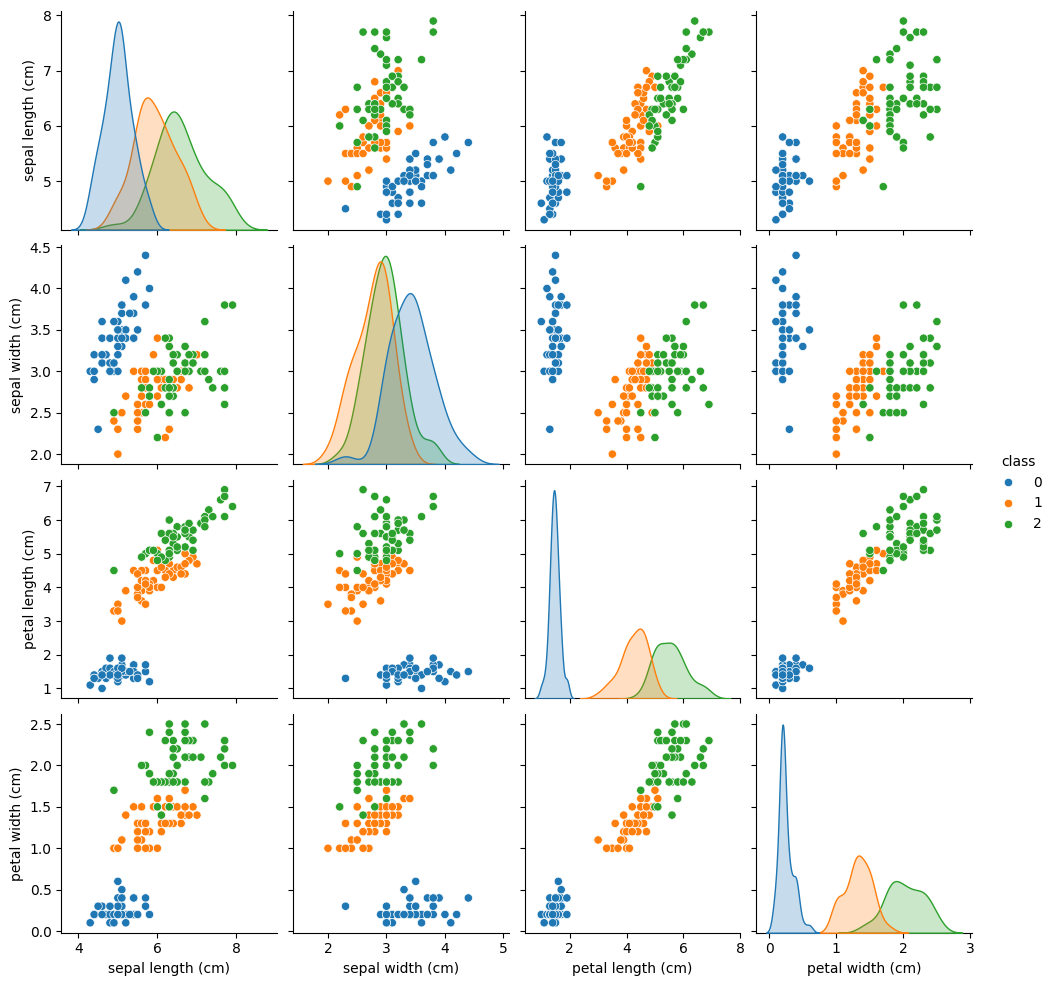

In [15]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["class"] = pd.Series(iris_data.target)

sns.pairplot(df, hue="class", palette="tab10")

##Classical Machine Learning Model(SVM) -Implementation -

In [16]:
#Classical Model
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [17]:

svc = SVC()
_ = svc.fit(train_features, train_labels)
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.99
Classical SVC on the test dataset:     0.97


##QML VQC  with class function **
The VQC is a special variant of the NeuralNetworkClassifier with a SamplerQNN




In [18]:

from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap,PauliFeatureMap
from qiskit_algorithms.optimizers import COBYLA, SPSA
from qiskit.circuit.library import RealAmplitudes, EfficientSU2
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit.primitives import Sampler

num_features = features.shape[1]

#Data encoding - encode the data as qubits
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
# Define the ZFeatureMap
feature_map_z = ZFeatureMap(feature_dimension=num_features, reps=1)
# Define the ZZFeatureMap
feature_map_zz = ZZFeatureMap(feature_dimension=num_features, reps=2)
# Define the PauliFeatureMap
feature_map_pauli = PauliFeatureMap(feature_dimension=num_features, reps=1)



In [20]:
# Define the encoders
encoders = {
    'ZFeatureMap': ZFeatureMap(feature_dimension=num_features, reps=2),
    'ZZFeatureMap': ZZFeatureMap(feature_dimension=num_features, reps=1),
    'PauliFeatureMap': PauliFeatureMap(feature_dimension=num_features, reps=1)
}
ansatz_types = {
    'RealAmplitudes': RealAmplitudes(num_qubits=num_features, reps=3),
    'EfficientSU2': EfficientSU2(num_qubits=num_features),

}
optimizers = {
    'COBYLA': COBYLA(maxiter=10),
    'SPSA': SPSA(maxiter=10)
}


In [21]:
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.rcParams["figure.figsize"] = (12, 6)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

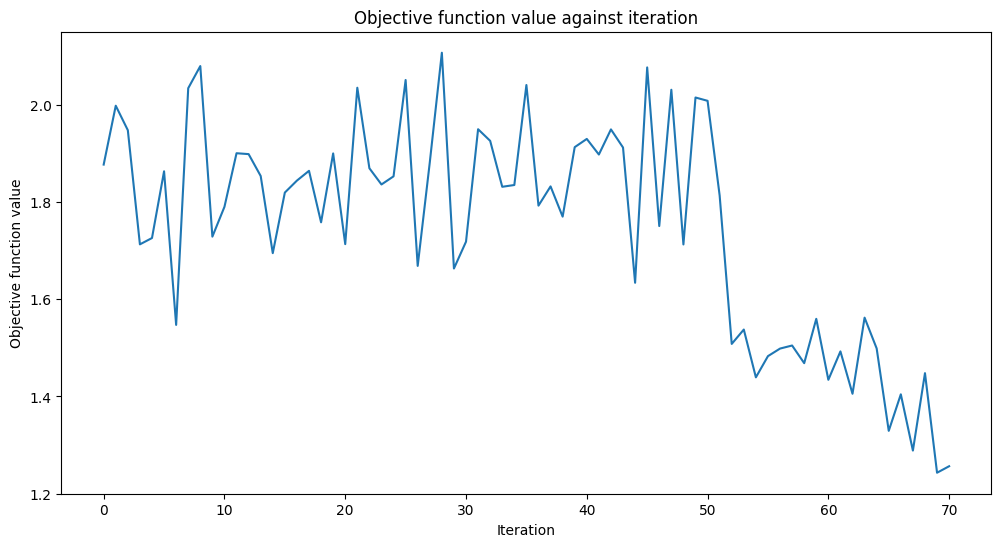

In [23]:
vqc_result=[]
import time
for encoder_name, encoder in encoders.items():
    for ansatz_name,ansatz in ansatz_types.items():
        for optimizer_name, optimizer in optimizers.items():
            sampler = Sampler()
            objective_func_vals = []
            vqc = VQC(sampler=sampler,feature_map=encoder,ansatz=ansatz,optimizer=optimizer,callback=callback_graph)
            start = time.time()
            vqc.fit(train_features, train_labels)
            elapsed = time.time() - start
            train_score_q4 = vqc.score(train_features, train_labels)
            test_score_q4 = vqc.score(test_features, test_labels)
            result={}
            result['Encoder']=encoder_name
            result['Ansatz']=ansatz_name
            result['Optimizer']=optimizer_name
            result['Train-core']=train_score_q4
            result['Test-score']=test_score_q4
            result['Circuit']=ansatz
            vqc_result.append(result)





In [29]:
for r in vqc_result:
    print(r)

print("********************************************************************************************************")






{'Encoder': 'ZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'COBYLA', 'Train-core': 0.525, 'Test-score': 0.6666666666666666}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'SPSA', 'Train-core': 0.44166666666666665, 'Test-score': 0.3}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'COBYLA', 'Train-core': 0.6333333333333333, 'Test-score': 0.8}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'SPSA', 'Train-core': 0.575, 'Test-score': 0.6333333333333333}
{'Encoder': 'ZZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'COBYLA', 'Train-core': 0.5, 'Test-score': 0.5}
{'Encoder': 'ZZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'SPSA', 'Train-core': 0.5083333333333333, 'Test-score': 0.6333333333333333}
{'Encoder': 'ZZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'COBYLA', 'Train-core': 0.39166666666666666, 'Test-score': 0.4}
{'Encoder': 'ZZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'SPSA', 'Train-core

##Reimplement VQC class and create a classifier using sampler QNN and Estimator QNN

##Sampler QNN

** Reimplement VQC class
and create a classifier using sampler QNN and Estimator QNN
without using the class function **

In [32]:
iris_data = load_iris()
X, y = iris_data.data, iris_data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
num_features=4

In [34]:
encoders = {
    'ZFeatureMap': ZFeatureMap(feature_dimension=num_features, reps=2),
    'ZZFeatureMap': ZZFeatureMap(feature_dimension=num_features, reps=1),
    'PauliFeatureMap': PauliFeatureMap(feature_dimension=num_features, reps=1)
}
ansatz_types = {
    'RealAmplitudes': RealAmplitudes(num_qubits=num_features, reps=3),
    'EfficientSU2': EfficientSU2(num_qubits=num_features),

}
optimizers = {
    'COBYLA': COBYLA(maxiter=30),
    'SPSA': SPSA(maxiter=30)
}

In [35]:
def parity(x):
    return "{:b}".format(x).count("1") % 3

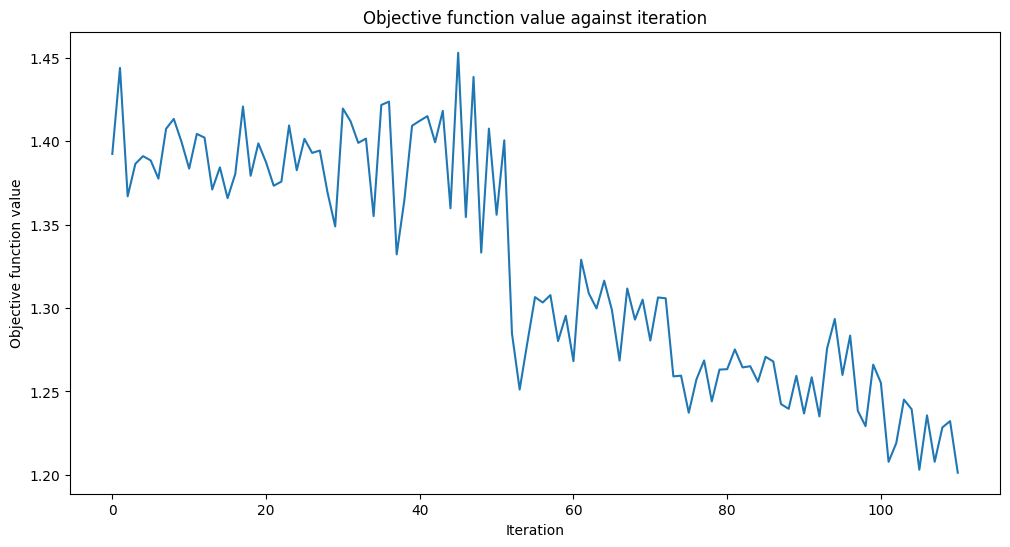

In [36]:
vqc_result_sn=[]
for encoder_name, encoder in encoders.items():
    for ansatz_name,ansatz in ansatz_types.items():
        for optimizer_name, optimizer in optimizers.items():
            sampler = Sampler()
            objective_func_vals = []
            qc = QNNCircuit(num_qubits=num_features, feature_map=encoder, ansatz=ansatz)
            sampler_qnn = SamplerQNN(circuit=qc,interpret=parity,output_shape=3)
            sampler_classifier = NeuralNetworkClassifier(neural_network=sampler_qnn, optimizer=optimizer, callback=callback_graph)
            start = time.time()
            sampler_classifier.fit(X_train, y_train)
            elapsed = time.time() - start
            train_score_samplerQNN = sampler_classifier.score(X_train, y_train)
            test_score_samplerQNN = sampler_classifier.score(X_test, y_test)
            result={}
            result['Encoder']=encoder_name
            result['Ansatz']=ansatz_name
            result['Optimizer']=optimizer_name
            result['Train-core']=train_score_samplerQNN
            result['Test-score']=test_score_samplerQNN
            result['Circuit']=ansatz
            vqc_result_sn.append(result)

In [41]:
for r in vqc_result_sn:
    print(r)

print("********************************************************************************************************")

{'Encoder': 'ZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'COBYLA', 'Train-core': 0.21666666666666667, 'Test-score': 0.23333333333333334, 'Circuit': <qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes object at 0x7b4522218c40>}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'SPSA', 'Train-core': 0.325, 'Test-score': 0.3333333333333333, 'Circuit': <qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes object at 0x7b4522218c40>}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'COBYLA', 'Train-core': 0.39166666666666666, 'Test-score': 0.36666666666666664, 'Circuit': <qiskit.circuit.library.n_local.efficient_su2.EfficientSU2 object at 0x7b4522219b10>}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'SPSA', 'Train-core': 0.625, 'Test-score': 0.7333333333333333, 'Circuit': <qiskit.circuit.library.n_local.efficient_su2.EfficientSU2 object at 0x7b4522219b10>}
{'Encoder': 'ZZFeatureMap', 'Ansatz': 'RealAmplitu

In [42]:
for r1 in vqc_result_sn:
    del r1['Circuit']
    print(r1)

{'Encoder': 'ZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'COBYLA', 'Train-core': 0.21666666666666667, 'Test-score': 0.23333333333333334}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'SPSA', 'Train-core': 0.325, 'Test-score': 0.3333333333333333}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'COBYLA', 'Train-core': 0.39166666666666666, 'Test-score': 0.36666666666666664}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'SPSA', 'Train-core': 0.625, 'Test-score': 0.7333333333333333}
{'Encoder': 'ZZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'COBYLA', 'Train-core': 0.475, 'Test-score': 0.36666666666666664}
{'Encoder': 'ZZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'SPSA', 'Train-core': 0.4583333333333333, 'Test-score': 0.3333333333333333}
{'Encoder': 'ZZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'COBYLA', 'Train-core': 0.43333333333333335, 'Test-score': 0.3333333333333333}
{'Encoder': 'ZZFeatu

In [ ]:
num_features=4
ansatz = RealAmplitudes(num_features, reps=3)
feature_map = ZZFeatureMap(num_features, reps=3)
qc = QNNCircuit(num_qubits=num_features, feature_map=feature_map, ansatz=ansatz)

In [ ]:
def parity(x):
    return "{:b}".format(x).count("1") % 3

output_shape = 3  # corresponds to the number of classes, possible outcomes of the (parity) mapping.

In [ ]:
sampler_qnn = SamplerQNN(
    circuit=qc,
    interpret=parity,
    output_shape=output_shape,
)
sampler_classifier = NeuralNetworkClassifier(
    neural_network=sampler_qnn, optimizer=COBYLA(maxiter=30), callback=callback_graph
)

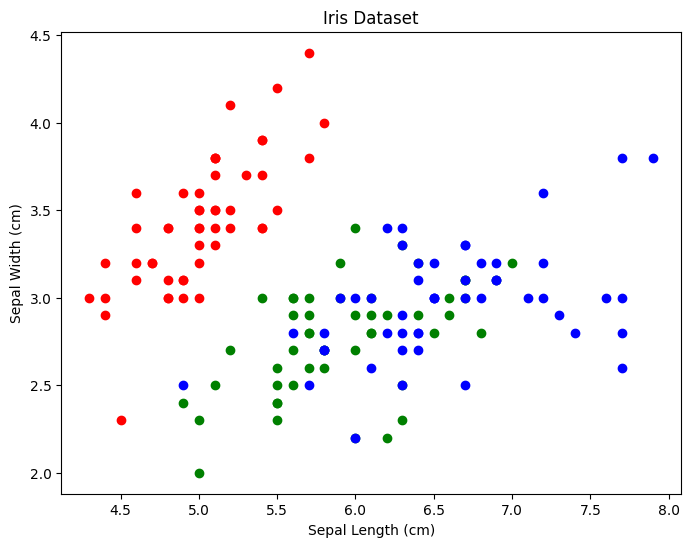

In [43]:
iris_data = load_iris()
X, y = iris_data.data[:, :2], iris_data.target

# Plot the data points
plt.figure(figsize=(8, 6))
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], color='r', label='Setosa')
    elif y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='g', label='Versicolor')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='b', label='Virginica')

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset')


# Show the plot
plt.show()

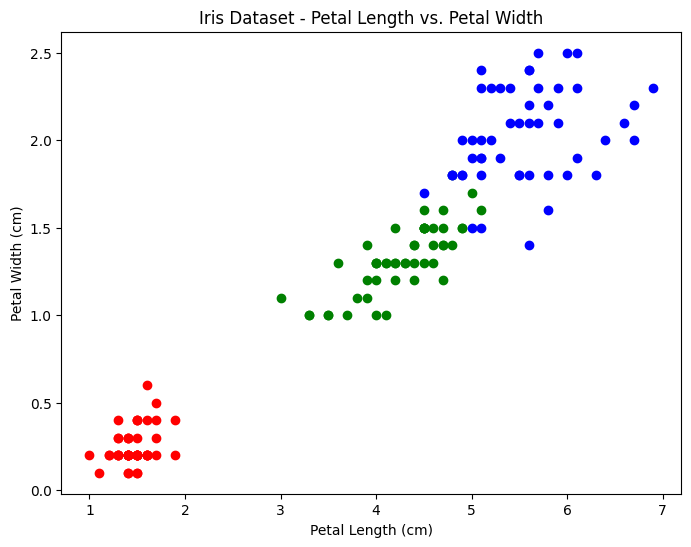

In [ ]:
X, y = iris_data.data[:, 2:], iris_data.target

# Plot the data points
plt.figure(figsize=(8, 6))
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], color='r', label='Setosa')
    elif y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='g', label='Versicolor')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='b', label='Virginica')

# Add labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset - Petal Length vs. Petal Width')


# Show the plot
plt.show()

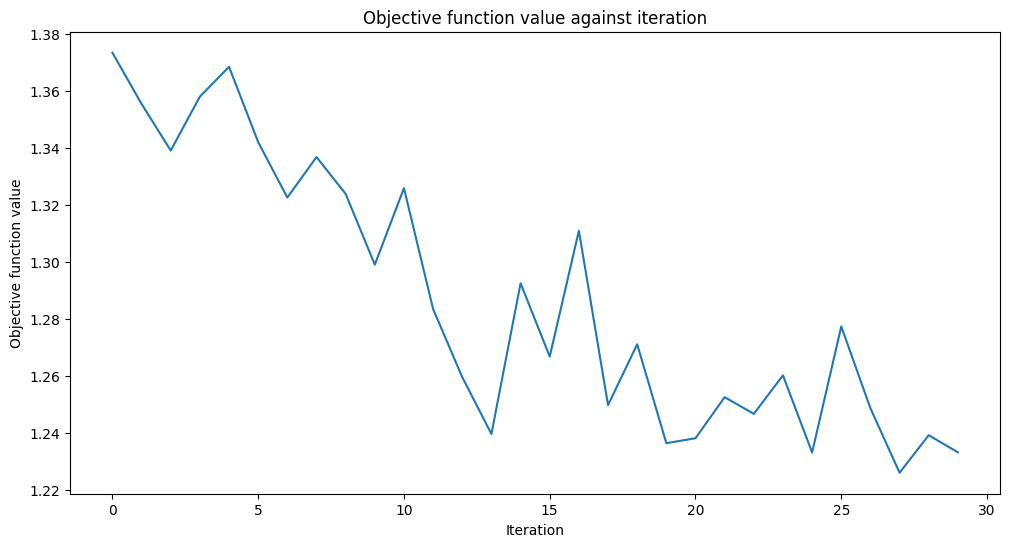

0.3416666666666667

In [ ]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)
sampler_classifier.fit(X_train, y_train)
plt.rcParams["figure.figsize"] = (6, 4)
sampler_classifier.score(X_train, y_train)


##EstimatorQNN

In [37]:
y_train_b = np.where((y_train == 1) | (y_train == 2), 1, y_train)
y_test_b = np.where((y_test == 1) | (y_test == 2), 1, y_test)


In [38]:
num_features=4
encoders = {
    'ZFeatureMap': ZFeatureMap(feature_dimension=num_features, reps=2),
    'ZZFeatureMap': ZZFeatureMap(feature_dimension=num_features, reps=1),
    'PauliFeatureMap': PauliFeatureMap(feature_dimension=num_features, reps=1)
}
ansatz_types = {
    'RealAmplitudes': RealAmplitudes(num_qubits=num_features, reps=3),
    'EfficientSU2': EfficientSU2(num_qubits=num_features),

}
optimizers = {
    'COBYLA': COBYLA(maxiter=30),
    'SPSA': SPSA(maxiter=30)
}

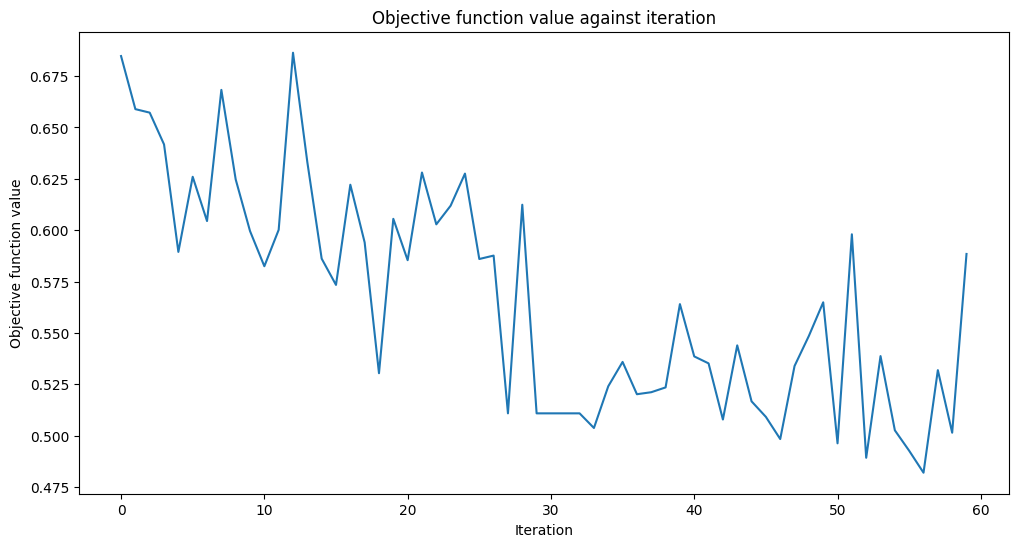

In [39]:
vqc_result_en=[]
for encoder_name, encoder in encoders.items():
    for ansatz_name,ansatz in ansatz_types.items():
        for optimizer_name, optimizer in optimizers.items():
            sampler = Sampler()
            objective_func_vals = []
            qc = QNNCircuit(num_qubits=num_features, feature_map=encoder, ansatz=ansatz)
            estimator_qnn = EstimatorQNN(circuit=qc)
            estimator_qnn.forward(X_train, np.random.random(estimator_qnn.num_weights))
            estimator_classifier = NeuralNetworkClassifier(estimator_qnn, optimizer=COBYLA(maxiter=60),callback=callback_graph)
            start = time.time()
            estimator_classifier.fit(X_train, y_train_b)
            estimator_classifier.score(X_test, y_test_b)
            elapsed = time.time() - start
            train_score_estimatorQNN = estimator_classifier.score(X_train, y_train_b)
            test_score_estimatorQNN = estimator_classifier.score(X_test, y_test_b)
            result={}
            result['Encoder']=encoder_name
            result['Ansatz']=ansatz_name
            result['Optimizer']=optimizer_name
            result['Train-core']=train_score_estimatorQNN
            result['Test-score']=test_score_estimatorQNN
            result['Circuit']=ansatz
            vqc_result_en.append(result)

In [40]:
for r in vqc_result_en:
    print(r)

print("********************************************************************************************************")

{'Encoder': 'ZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'COBYLA', 'Train-core': 0.6583333333333333, 'Test-score': 0.6, 'Circuit': <qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes object at 0x7b451d1de410>}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'SPSA', 'Train-core': 0.6416666666666667, 'Test-score': 0.6333333333333333, 'Circuit': <qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes object at 0x7b451d1de410>}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'COBYLA', 'Train-core': 0.6416666666666667, 'Test-score': 0.5666666666666667, 'Circuit': <qiskit.circuit.library.n_local.efficient_su2.EfficientSU2 object at 0x7b451e868e50>}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'SPSA', 'Train-core': 0.6166666666666667, 'Test-score': 0.6333333333333333, 'Circuit': <qiskit.circuit.library.n_local.efficient_su2.EfficientSU2 object at 0x7b451e868e50>}
{'Encoder': 'ZZFeatureMap', 'Ansatz': 'Real

In [44]:
for r2 in vqc_result_en:
  del r2["Circuit"]
  print(r2)

print("********************************************************************************************************")

{'Encoder': 'ZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'COBYLA', 'Train-core': 0.6583333333333333, 'Test-score': 0.6}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'SPSA', 'Train-core': 0.6416666666666667, 'Test-score': 0.6333333333333333}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'COBYLA', 'Train-core': 0.6416666666666667, 'Test-score': 0.5666666666666667}
{'Encoder': 'ZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'SPSA', 'Train-core': 0.6166666666666667, 'Test-score': 0.6333333333333333}
{'Encoder': 'ZZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'COBYLA', 'Train-core': 0.575, 'Test-score': 0.36666666666666664}
{'Encoder': 'ZZFeatureMap', 'Ansatz': 'RealAmplitudes', 'Optimizer': 'SPSA', 'Train-core': 0.5666666666666667, 'Test-score': 0.5666666666666667}
{'Encoder': 'ZZFeatureMap', 'Ansatz': 'EfficientSU2', 'Optimizer': 'COBYLA', 'Train-core': 0.5166666666666667, 'Test-score': 0.5333333333333333}
{'Encoder': 'Z

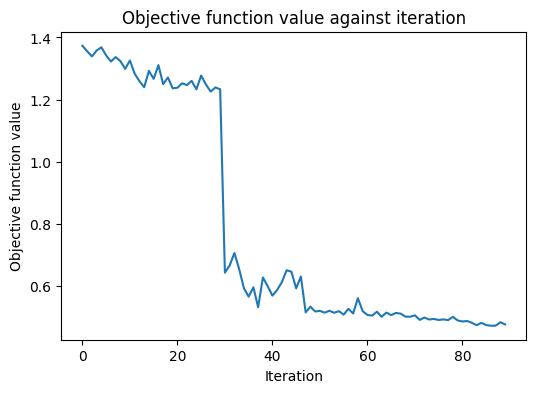

In [ ]:
num_features=4
ansatz = RealAmplitudes(num_features, reps=3)
feature_map = ZZFeatureMap(num_features, reps=1)
qc = QNNCircuit(num_qubits=num_features, feature_map=feature_map, ansatz=ansatz)
estimator_qnn = EstimatorQNN(circuit=qc)
estimator_qnn.forward(X_train, np.random.random(estimator_qnn.num_weights))
estimator_classifier = NeuralNetworkClassifier(estimator_qnn, optimizer=COBYLA(maxiter=60),callback=callback_graph)
estimator_classifier.fit(X_train, y_train_b)
estimator_classifier.score(X_test, y_test_b)
train_score_estimatorQNN = estimator_classifier.score(X_train, y_train_b)
test_score_estimatorQNN = estimator_classifier.score(X_test, y_test_b)

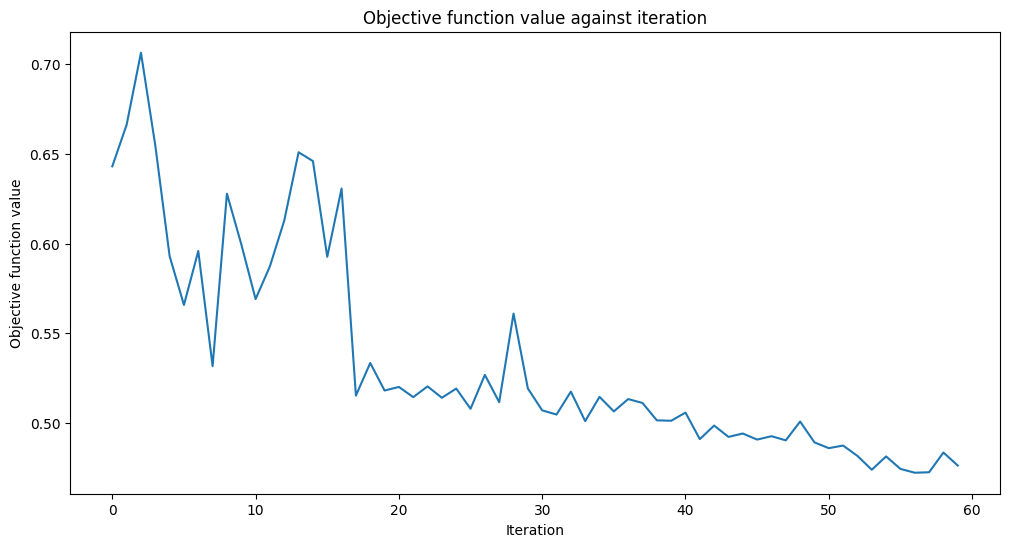

0.4

In [ ]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)
estimator_classifier.fit(X_train, y_train_b)
plt.rcParams["figure.figsize"] = (6, 4)
estimator_classifier.score(X_test, y_test_b)

In [ ]:
print(f"Model                                  | Test Score | Train Score")
train_score_samplerQNN = sampler_classifier.score(X_train, y_train)
test_score_samplerQNN = sampler_classifier.score(X_test, y_test)
print(f"samplerQNN, 4 features, RealAmplitudes | {train_score_samplerQNN:10.2f} | {test_score_samplerQNN:10.2f}")
print(f"estimatorQNN, 4 features, RealAmplitudes | {train_score_estimatorQNN:10.2f} | {test_score_estimatorQNN:10.2f}")
print(f"VQC, 4 features, RealAmplitudes        | {train_score_q4:10.2f} | {test_score_q4:10.2f}")


Model                                  | Test Score | Train Score
samplerQNN, 4 features, RealAmplitudes |       0.34 |       0.37
estimatorQNN, 4 features, RealAmplitudes |       0.54 |       0.40
VQC, 4 features, RealAmplitudes        |       0.85 |       0.87


##Exploratory Code

In [ ]:
def variational_circuit(params):
    qc = QuantumCircuit(4)
    qc.rx(params[0], 0)
    qc.rx(params[1], 1)
    return qc

# Define the quantum circuit for the measurement (sampler QNN)
def sampler_qnn_circuit(params, feature_map):
    qc = QuantumCircuit(4)
    qc.compose(feature_map, [0])
    qc.compose(variational_circuit(params), [1])
    qc.measure_all()
    return qc

# Define the quantum circuit for the estimator QNN
def estimator_qnn_circuit(params):
    qc = QuantumCircuit(4)
    qc.compose(variational_circuit(params), [0, 1])
    qc.measure_all()
    return qc

# Perform classical optimization
def optimize(params, feature_map, training_data):
    sampler_qnn = sampler_qnn_circuit(params, feature_map)
    backend = Aer.get_backend('qasm_simulator')
    sampler = CircuitSampler(backend, param_qc=sampler_qnn)
    expectation = sampler.convert(Z ^ Z)
    cost = 0
    for data, label in training_data:
        expectation_result = sampler.sample_expectation(
            expectation, params=params, data=data)
        cost += (expectation_result - label) ** 2
    return cost
